<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/ecommerce_analysis_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***E-commerce Marketing and sales***

# **Load and Inspect Data:**

In [3]:
import pandas as pd

# Load all files
online_sales = pd.read_csv('/content/Online_Sales.csv', parse_dates=['Transaction_Date'])
customers = pd.read_excel('/content/CustomersData.xlsx')
discounts = pd.read_csv('/content/Discount_Coupon.csv')
marketing = pd.read_csv('/content/Marketing_Spend.csv', parse_dates=['Date'])
tax = pd.read_excel('/content/Tax_amount.xlsx')


In [4]:
# Checking first few rows and data types
print("Online Sales:\n", online_sales.info())
print("\nCustomers:\n", customers.info())
print("\nDiscount Coupons:\n", discounts.info())
print("\nMarketing Spend:\n", marketing.info())
print("\nTax Info:\n", tax.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB
Online Sales:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):


In [5]:
print("Missing values in Online Sales:\n", online_sales.isnull().sum())
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Discount Coupons:\n", discounts.isnull().sum())
print("Missing values in Marketing Spend:\n", marketing.isnull().sum())
print("Missing values in Tax:\n", tax.isnull().sum())


Missing values in Online Sales:
 CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64
Missing values in Customers:
 CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64
Missing values in Discount Coupons:
 Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64
Missing values in Marketing Spend:
 Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64
Missing values in Tax:
 Product_Category    0
GST                 0
dtype: int64


In [7]:
# Convert percentages if needed
discounts['Discount_pct'] = discounts['Discount_pct'] / 100
tax['GST'] = tax['GST'] / 100
tax['GST']

,GST
0,0.000010
1,0.000010
2,0.000018
3,0.000018
4,0.000018
5,0.000018
6,0.000005
7,0.000005
8,0.000018
9,0.000018


# **DateHandling**
Hint: Ensure that date-related columns are in a format suitable for time-series analysis. Extracting components like Month might be useful

In [9]:
# Ensure proper datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'])
marketing['Date'] = pd.to_datetime(marketing['Date'])

# If 'Month' in discounts is string type, parse it
discounts['Month'] = pd.to_datetime(discounts['Month'], format='%b-%y', errors='coerce')
# Online Sales
online_sales['Year'] = online_sales['Transaction_Date'].dt.year
online_sales['Month'] = online_sales['Transaction_Date'].dt.month
online_sales['Month_Name'] = online_sales['Transaction_Date'].dt.strftime('%B')
online_sales['Month_Year'] = online_sales['Transaction_Date'].dt.to_period('M')

# Marketing Spend
marketing['Month_Year'] = marketing['Date'].dt.to_period('M')

# Discounts (already aggregated by month)
discounts['Month_Year'] = discounts['Month'].dt.to_period('M')


# **Data Merging**
Hint: You will likely need to combine information from different datasets to answer the business questions. Think about common keys that can link these datasets. Consider the type of join that best suits your analytical needs.


In [17]:
merged_df = online_sales.merge(customers, on='CustomerID', how='left')

merged_df = merged_df.merge(tax, on='Product_Category', how='left')


discounts['Month_Year'] = discounts['Month'].dt.to_period('M')
merged_df['Month_Year'] = merged_df['Transaction_Date'].dt.to_period('M')

merged_df = merged_df.merge(discounts[['Product_Category', 'Month_Year', 'Discount_pct']],
                            on=['Product_Category', 'Month_Year'], how='left')


monthly_marketing = marketing.groupby(marketing['Date'].dt.to_period('M')).agg({
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum'
}).reset_index().rename(columns={'Date': 'Month_Year'})


merged_df = merged_df.merge(monthly_marketing, on='Month_Year', how='left')
print(merged_df.head())
print("Rows with missing GST values:", merged_df['GST'].isnull().sum())
print("Rows with missing Discount_pct values:", merged_df['Discount_pct'].isnull().sum())
print("Rows with missing marketing spend:", merged_df[['Online_Spend', 'Offline_Spend']].isnull().sum())


   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  Month  \
0         1     153.71               6.5          Used  ...      1   
1         1     153.71  

# **Calculate Core Metrics:**
Hint: The Invoice Value (or revenue) is a fundamental metric. You can calculate it as follows:
Invoice Value = ((Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges.
Ensure all necessary components are available and correctly formatted for this calculation (e.g., Discount_pct in decimal form).


In [55]:
# Fill missing discount and GST with 0 if not available
merged_df['Discount_pct'] = merged_df['Discount_pct'].fillna(0)
merged_df['GST'] = merged_df['GST'].fillna(0)
merged_df['Delivery_Charges'] = merged_df['Delivery_Charges'].fillna(0)
merged_df['Invoice_Value'] = (
    (merged_df['Quantity'] * merged_df['Avg_Price']) *
    (1 - merged_df['Discount_pct']) *
    (1 + merged_df['GST'])
) + merged_df['Delivery_Charges']
print("Invoice Value Summary:\n", merged_df['Invoice_Value'].describe())
print("Any negative values?:", (merged_df['Invoice_Value'] < 0).sum())



Invoice Value Summary:
 count    52924.000000
mean        98.773357
std        166.442832
min          4.120074
25%         19.590245
50%         42.890655
75%        129.271228
max      10518.442562
Name: Invoice_Value, dtype: float64
Any negative values?: 0


# **Business Questions & Hints**


# **Q1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?**


## Identify the months with the highest and lowest acquisition rates.

In [56]:
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

first_purchase = merged_df.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase['Acquisition_Month'] = first_purchase['Transaction_Date'].dt.to_period('M')

monthly_acquisition = first_purchase.groupby('Acquisition_Month').size().reset_index(name='New_Customers')

monthly_acquisition['Acquisition_Month'] = monthly_acquisition['Acquisition_Month'].dt.to_timestamp()

monthly_acquisition = monthly_acquisition.sort_values('Acquisition_Month')
highest = monthly_acquisition.loc[monthly_acquisition['New_Customers'].idxmax()]
lowest = monthly_acquisition.loc[monthly_acquisition['New_Customers'].idxmin()]

print(f"monthly_acquisition: {monthly_acquisition}")
print(f"Highest acquisition month: {highest['Acquisition_Month']} ({highest['New_Customers']} new customers)")
print(f"Lowest acquisition month: {lowest['Acquisition_Month']} ({lowest['New_Customers']} new customers)")

monthly_acquisition:    Acquisition_Month  New_Customers
0         2019-01-01            215
1         2019-02-01             96
2         2019-03-01            177
3         2019-04-01            163
4         2019-05-01            112
5         2019-06-01            137
6         2019-07-01             94
7         2019-08-01            135
8         2019-09-01             78
9         2019-10-01             87
10        2019-11-01             68
11        2019-12-01            106
Highest acquisition month: 2019-01-01 00:00:00 (215 new customers)
Lowest acquisition month: 2019-11-01 00:00:00 (68 new customers)


##What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?


*   Could be seasonal campgain ex: May-June for school reopen, festivals in August-September
*   Offer based ex: free delivery for first purchase etc..



#**Q2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?**


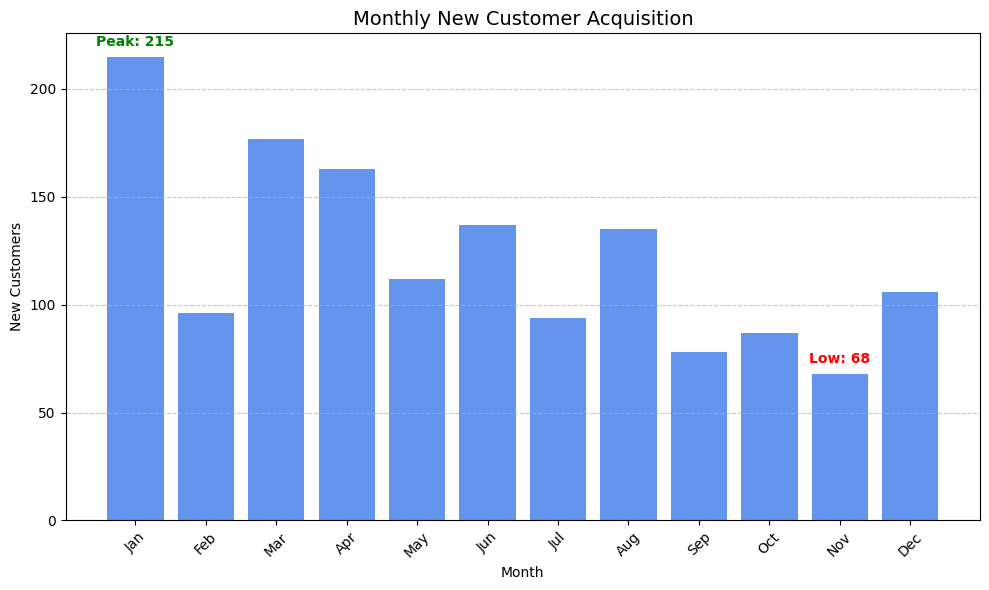

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(monthly_acquisition['Acquisition_Month'].dt.strftime('%b'), monthly_acquisition['New_Customers'], color='cornflowerblue')

plt.title('Monthly New Customer Acquisition', fontsize=14)
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate high and low
plt.text(highest['Acquisition_Month'].month - 1, highest['New_Customers'] + 5,
         f"Peak: {highest['New_Customers']}", ha='center', color='green', fontweight='bold')
plt.text(lowest['Acquisition_Month'].month - 1, lowest['New_Customers'] + 5,
         f"Low: {lowest['New_Customers']}", ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()


In [58]:
# Acquisition_Month must be datetime
# monthly_acquisition['Acquisition_Month'] = pd.to_datetime(monthly_acquisition['Acquisition_Month'])

# Classify month performance
def classify(monthly_customers):
    if monthly_customers >= 160:
        return 'High'
    elif monthly_customers >= 110:
        return 'Average'
    else:
        return 'Low'

monthly_acquisition['Performance'] = monthly_acquisition['New_Customers'].apply(classify)

# Add suggested strategy column
def suggest_strategy(perf):
    if perf == 'High':
        return 'Replicate the success'
    elif perf == 'Average':
        return 'continue the performance'
    else:
        return 'Provide offers'

monthly_acquisition['Suggested_Strategy'] = monthly_acquisition['Performance'].apply(suggest_strategy)

# View strategy plan
print(monthly_acquisition[['Acquisition_Month', 'New_Customers', 'Performance', 'Suggested_Strategy']])


   Acquisition_Month  New_Customers Performance        Suggested_Strategy
0         2019-01-01            215        High     Replicate the success
1         2019-02-01             96         Low            Provide offers
2         2019-03-01            177        High     Replicate the success
3         2019-04-01            163        High     Replicate the success
4         2019-05-01            112     Average  continue the performance
5         2019-06-01            137     Average  continue the performance
6         2019-07-01             94         Low            Provide offers
7         2019-08-01            135     Average  continue the performance
8         2019-09-01             78         Low            Provide offers
9         2019-10-01             87         Low            Provide offers
10        2019-11-01             68         Low            Provide offers
11        2019-12-01            106         Low            Provide offers


3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?
Hint: Explore methods to track customer activity over time to understand retention. Defining cohorts based on their initial purchase month and observing their subsequent engagement can be insightful.
Hint: For periods with weaker retention, consider what might lead to customer churn and what proactive measures could re-engage them.

# **Q3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?**


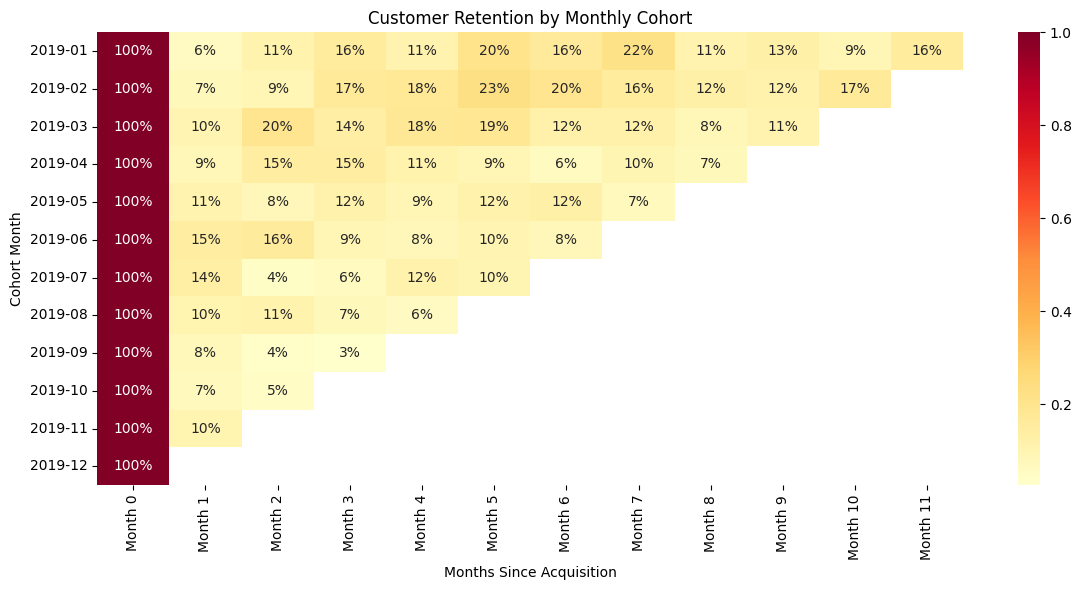

In [59]:
from operator import attrgetter
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

merged_df['Cohort_Month'] = merged_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

merged_df['Txn_Month'] = merged_df['Transaction_Date'].dt.to_period('M')

cohort_data = merged_df.groupby(['Cohort_Month', 'Txn_Month'])['CustomerID'].nunique().reset_index()

cohort_data['Cohort_Index'] = (cohort_data['Txn_Month'] - cohort_data['Cohort_Month']).apply(attrgetter('n'))

retention_matrix = cohort_data.pivot(index='Cohort_Month', columns='Cohort_Index', values='CustomerID')

cohort_sizes = retention_matrix.iloc[:, 0]
retention_rate = retention_matrix.divide(cohort_sizes, axis=0).round(3)
retention_rate.columns = [f'Month {i}' for i in retention_rate.columns]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='YlOrRd', cbar=True)
plt.title('Customer Retention by Monthly Cohort')
plt.xlabel('Months Since Acquisition')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()



# **Q4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.**


In [62]:
top_retention = retention_rate['Month 1'].sort_values(ascending=False)
print(top_retention.head(3))

high_retention_months = top_retention.head(2).index.to_list()

high_retention_periods = [pd.Period(m, freq='M') for m in high_retention_months]
low_retention_periods = top_retention.tail(2).index.tolist()



high_cohort_customers = merged_df[merged_df['Cohort_Month'].isin(high_retention_periods)]
low_cohort_customers = merged_df[merged_df['Cohort_Month'].isin(low_retention_periods)]

top_categories = high_cohort_customers['Product_Category'].value_counts().head(5)
print("Top Product Categories:\n", top_categories)

coupon_usage = high_cohort_customers['Coupon_Status'].value_counts(normalize=True)
print("Coupon Usage (%):\n", (coupon_usage * 100).round(2))

avg_invoice_value = high_cohort_customers['Invoice_Value'].mean()
print(f"Average Invoice Value: ₹{avg_invoice_value:.2f}")


Cohort_Month
2019-06    0.146
2019-07    0.138
2019-05    0.107
Freq: M, Name: Month 1, dtype: float64
Top Product Categories:
 Product_Category
Apparel      2520
Nest-USA     1733
Office        771
Lifestyle     412
Drinkware     373
Name: count, dtype: int64
Coupon Usage (%):
 Coupon_Status
Clicked     51.16
Used        33.88
Not Used    14.96
Name: proportion, dtype: float64
Average Invoice Value: ₹87.81


In [66]:
def summarize_behavior(df, label):
    top_category = df['Product_Category'].value_counts().idxmax()
    coupon_used_pct = df['Coupon_Status'].eq('Used').mean() * 100
    avg_invoice = df['Invoice_Value'].mean()
    avg_discount = df['Discount_pct'].mean() * 100
    order_freq = df.groupby('CustomerID').size().mean()

    return {
        'Cohort Type': label,
        'Top Category': top_category,
        'Coupon Usage (%)': round(coupon_used_pct, 2),
        'Avg Invoice Value (₹)': round(avg_invoice, 2),
        'Avg Discount (%)': round(avg_discount, 2),
        'Avg Orders per Customer': round(order_freq, 2)
    }

# Apply for both groups
high_summary = summarize_behavior(high_cohort_customers, 'High Retention')
low_summary = summarize_behavior(low_cohort_customers, 'Low Retention')

# Create a comparison DataFrame
comparison_df = pd.DataFrame([high_summary, low_summary])
print(comparison_df)


      Cohort Type Top Category  Coupon Usage (%)  Avg Invoice Value (₹)  \
0  High Retention      Apparel             33.88                  87.81   
1   Low Retention      Apparel             34.16                 109.53   

   Avg Discount (%)  Avg Orders per Customer  
0               0.0                    29.17  
1               0.0                    40.87  


# **Q5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?**


In [78]:
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])
if 'First_Purchase_Date' in merged_df.columns:
    merged_df = merged_df.drop(columns=['First_Purchase_Date'])

first_txn = merged_df.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_txn.columns = ['CustomerID', 'First_Purchase_Date']
merged_df = pd.merge(merged_df, first_txn, on='CustomerID', how='left')

merged_df['Customer_Type'] = merged_df.apply(
    lambda x: 'New' if x['Transaction_Date'].date() == x['First_Purchase_Date'].date() else 'Existing',
    axis=1
)
print(merged_df[['CustomerID', 'Transaction_Date', 'First_Purchase_Date', 'Customer_Type']].head())


   CustomerID Transaction_Date First_Purchase_Date Customer_Type
0       17850       2019-01-01          2019-01-01           New
1       17850       2019-01-01          2019-01-01           New
2       17850       2019-01-01          2019-01-01           New
3       17850       2019-01-01          2019-01-01           New
4       17850       2019-01-01          2019-01-01           New


<Figure size 1200x600 with 0 Axes>

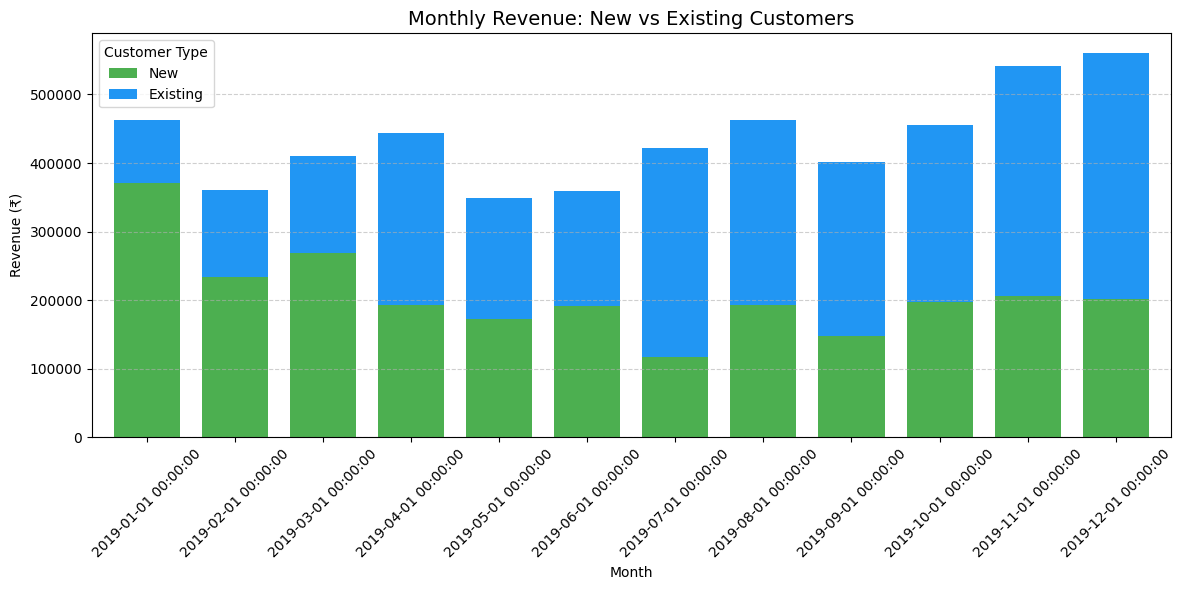

In [79]:
merged_df['Txn_Month'] = merged_df['Transaction_Date'].dt.to_period('M')
# Aggregate revenue by month and customer type
monthly_revenue = (
    merged_df.groupby(['Txn_Month', 'Customer_Type'])['Invoice_Value']
    .sum()
    .reset_index()
)
# Pivot for stacked bar chart
revenue_pivot = monthly_revenue.pivot(index='Txn_Month', columns='Customer_Type', values='Invoice_Value').fillna(0)

# Optional: sort by date
revenue_pivot = revenue_pivot.sort_index()

# Convert period to datetime for better plotting
revenue_pivot.index = revenue_pivot.index.to_timestamp()
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
revenue_pivot[['New', 'Existing']].plot(
    kind='bar',
    stacked=True,
    color=['#4caf50', '#2196f3'],
    figsize=(12, 6),
    width=0.75
)

plt.title('Monthly Revenue: New vs Existing Customers', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# **Q6: 6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?**


Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64
  Coupon_Status  Total_Revenue  Avg_Invoice_Value  Transaction_Count
0       Clicked   2.662847e+06          98.894993              26926
1      Not Used   8.163148e+05         100.854313               8094
2          Used   1.748320e+06          97.649674              17904


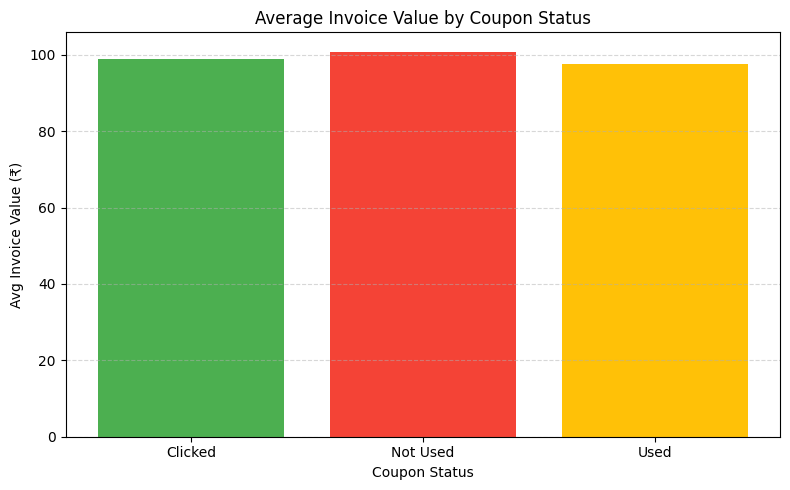

In [82]:
merged_df['Coupon_Status'] = merged_df['Coupon_Status'].fillna('Not Used')
merged_df['Coupon_Status'] = merged_df['Coupon_Status'].str.strip().str.title()
print(merged_df['Coupon_Status'].value_counts())

# Total revenue per category
revenue_by_coupon = merged_df.groupby('Coupon_Status')['Invoice_Value'].agg(['sum', 'mean', 'count']).reset_index()
revenue_by_coupon.columns = ['Coupon_Status', 'Total_Revenue', 'Avg_Invoice_Value', 'Transaction_Count']
print(revenue_by_coupon)

import matplotlib.pyplot as plt

# Bar chart of average invoice value
plt.figure(figsize=(8, 5))
plt.bar(revenue_by_coupon['Coupon_Status'], revenue_by_coupon['Avg_Invoice_Value'], color=['#4caf50', '#f44336', '#ffc107'])
plt.title('Average Invoice Value by Coupon Status')
plt.ylabel('Avg Invoice Value (₹)')
plt.xlabel('Coupon Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [83]:
#Statistical Test
from scipy.stats import ttest_ind

used = merged_df[merged_df['Coupon_Status'] == 'Used']['Invoice_Value']
not_used = merged_df[merged_df['Coupon_Status'] == 'Not Used']['Invoice_Value']

# Perform independent t-test
t_stat, p_value = ttest_ind(used, not_used, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-statistic: -1.37, P-value: 0.1722


In [85]:
# Aggregate key metrics
coupon_summary = (
    merged_df
    .groupby('Coupon_Status')['Invoice_Value']
    .agg(
        Total_Revenue='sum',
        Avg_Invoice_Value='mean',
        Transaction_Count='count'
    )
    .reset_index()
)

# Calculate revenue per transaction explicitly (same as avg_invoice, but kept for clarity)
coupon_summary['Revenue_per_Transaction'] = (coupon_summary['Total_Revenue'] / coupon_summary['Transaction_Count']).round(2)

# Round all monetary values
coupon_summary['Total_Revenue'] = coupon_summary['Total_Revenue'].round(2)
coupon_summary['Avg_Invoice_Value'] = coupon_summary['Avg_Invoice_Value'].round(2)
print(coupon_summary)

  Coupon_Status  Total_Revenue  Avg_Invoice_Value  Transaction_Count  \
0       Clicked     2662846.57              98.89              26926   
1      Not Used      816314.81             100.85               8094   
2          Used     1748319.76              97.65              17904   

   Revenue_per_Transaction  
0                    98.89  
1                   100.85  
2                    97.65  


# **Q7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?**


In [87]:
product_summary = (
    merged_df
    .groupby(['Product_SKU', 'Product_Description', 'Product_Category'])
    .agg(
        Total_Quantity=('Quantity', 'sum'),
        Total_Revenue=('Invoice_Value', 'sum'),
        Avg_Price=('Avg_Price', 'mean'),
        Transactions=('Transaction_ID', 'nunique'),
        Avg_Discount=('Discount_pct', 'mean')
    )
    .reset_index()
)

# Sort by total revenue
product_summary = product_summary.sort_values(by='Total_Revenue', ascending=False)

# Round for readability
product_summary['Total_Revenue'] = product_summary['Total_Revenue'].round(2)
product_summary['Avg_Price'] = product_summary['Avg_Price'].round(2)
product_summary['Avg_Discount'] = (product_summary['Avg_Discount'] * 100).round(2)
top_products = product_summary.head(10)
print(top_products)


        Product_SKU                                Product_Description  \
981  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
983  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
976  GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
984  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
985  GGOENEBQ079199      Nest Protect Smoke + CO White Wired Alarm-USA   
989  GGOENEBQ084699       Nest Learning Thermostat 3rd Gen-USA - White   
994  GGOENEBQ092299        Nest Secure Alarm System Starter Pack - USA   
990  GGOENEBQ086499                                  Nest Cam IQ - USA   
992  GGOENEBQ086799                            Nest Thermostat E - USA   
980  GGOENEBD084799      Nest Learning Thermostat 3rd Gen-USA - Copper   

    Product_Category  Total_Quantity  Total_Revenue  Avg_Price  Transactions  \
981         Nest-USA            4570      713879.92     150.98          3511   
983         Nest-USA     

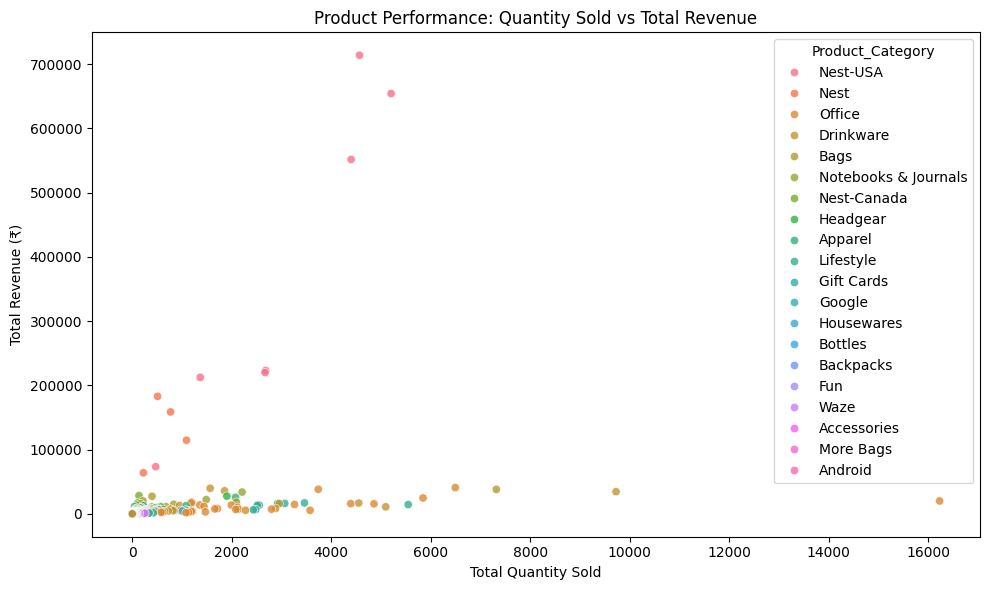

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_summary,
    x='Total_Quantity',
    y='Total_Revenue',
    hue='Product_Category',
    alpha=0.8
)
plt.title('Product Performance: Quantity Sold vs Total Revenue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue (₹)')
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# Already grouped earlier:
# product_summary = groupby SKU, Description, Category...

# Get top 10 by revenue
top_products = product_summary.sort_values(by='Total_Revenue', ascending=False).head(10)
fig = go.Figure(data=[go.Table(
    header=dict(values=[
        'SKU', 'Product Description', 'Category', 'Qty Sold',
        'Total Revenue (₹)', 'Avg Price (₹)', 'Avg Discount (%)'
    ],
    fill_color='paleturquoise', align='left'),
    cells=dict(values=[
        top_products['Product_SKU'],
        top_products['Product_Description'],
        top_products['Product_Category'],
        top_products['Total_Quantity'],
        top_products['Total_Revenue'],
        top_products['Avg_Price'],
        top_products['Avg_Discount']
    ],
    fill_color='lavender', align='left'))
])

fig.update_layout(title='Top Performing Products Scorecard')
fig.show()


In [91]:
fig = px.bar(
    top_products,
    x='Product_Description',
    y='Total_Revenue',
    color='Product_Category',
    hover_data=['Total_Quantity', 'Avg_Price', 'Avg_Discount'],
    text='Total_Revenue',
    title='Top Products by Revenue',
    labels={'Total_Revenue': 'Revenue (₹)', 'Product_Description': 'Product'}
)
fig.update_traces(texttemplate='₹%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

# **Q8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?**


In [95]:
merged_df['Txn_Month'] = merged_df['Transaction_Date'].dt.to_period('M')

monthly_revenue = (
    merged_df.groupby('Txn_Month')['Invoice_Value']
    .sum()
    .reset_index()
    .rename(columns={'Invoice_Value': 'Total_Revenue'})
)

monthly_revenue['Txn_Month'] = monthly_revenue['Txn_Month'].dt.to_timestamp()

marketing['Date'] = pd.to_datetime(marketing['Date'])
marketing['Month'] = marketing['Date'].dt.to_period('M')

monthly_spend = (
    marketing.groupby('Month')[['Online_Spend', 'Offline_Spend']]
    .sum()
    .reset_index()
)

monthly_spend['Month'] = monthly_spend['Month'].dt.to_timestamp()
monthly_spend['Total_Spend'] = monthly_spend['Online_Spend'] + monthly_spend['Offline_Spend']

# Merge both datasets
marketing_roi = pd.merge(
    monthly_revenue,
    monthly_spend,
    left_on='Txn_Month',
    right_on='Month',
    how='inner'
)

# Calculate ROI
marketing_roi['Marketing_ROI'] = (marketing_roi['Total_Revenue'] / marketing_roi['Total_Spend']).round(2)

# Clean up
marketing_roi = marketing_roi.drop(columns=['Month'])


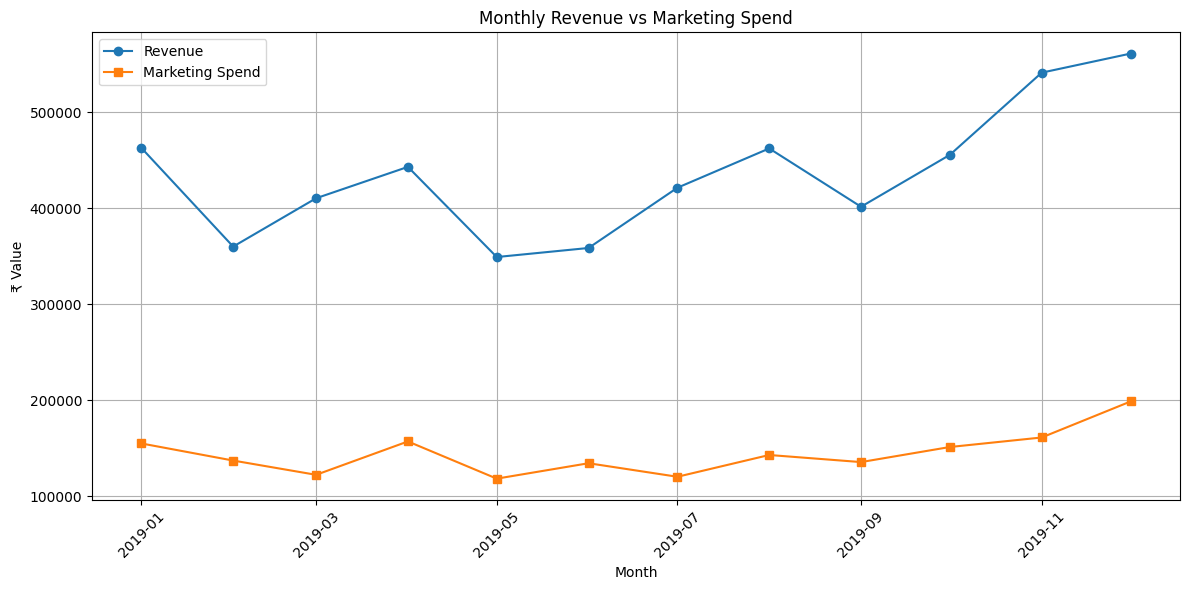

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(marketing_roi['Txn_Month'], marketing_roi['Total_Revenue'], label='Revenue', marker='o')
plt.plot(marketing_roi['Txn_Month'], marketing_roi['Total_Spend'], label='Marketing Spend', marker='s')
plt.title('Monthly Revenue vs Marketing Spend')
plt.xlabel('Month')
plt.ylabel('₹ Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


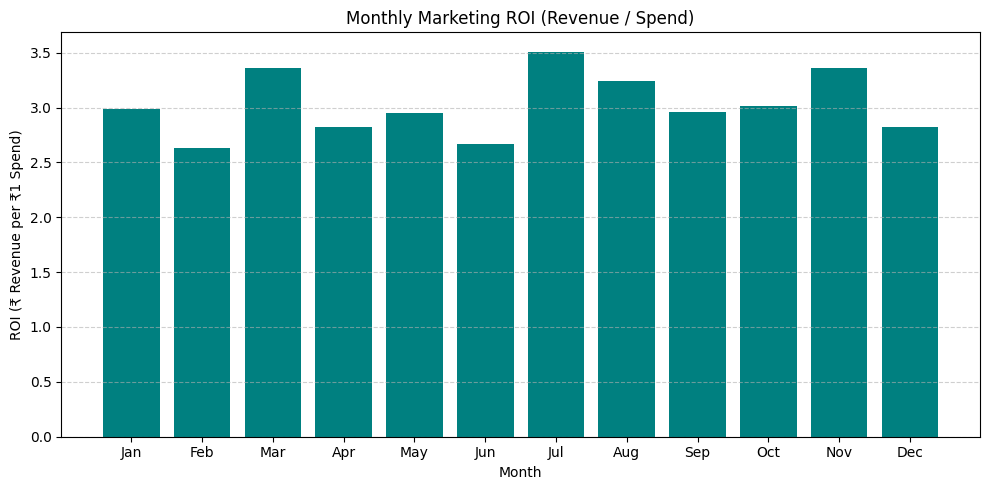

In [97]:
plt.figure(figsize=(10, 5))
plt.bar(marketing_roi['Txn_Month'].dt.strftime('%b'), marketing_roi['Marketing_ROI'], color='teal')
plt.title('Monthly Marketing ROI (Revenue / Spend)')
plt.xlabel('Month')
plt.ylabel('ROI (₹ Revenue per ₹1 Spend)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [99]:
correlation = marketing_roi['Total_Revenue'].corr(marketing_roi['Total_Spend'])
print(f" Correlation between marketing spend and revenue: {correlation:.2f}")


 Correlation between marketing spend and revenue: 0.83


# **Q9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?**

In [104]:
# Efficiency metric: Spend as a % of revenue
marketing_roi['Spend_%_of_Revenue'] = (
    marketing_roi['Total_Spend'] / marketing_roi['Total_Revenue']
).round(3) * 100  # Convert to percentage

# Month name for reporting
marketing_roi['Month'] = marketing_roi['Txn_Month'].dt.strftime('%b')

efficiency_table = marketing_roi[['Month', 'Total_Spend', 'Total_Revenue', 'Marketing_ROI', 'Spend_%_of_Revenue']].copy()

# Format for presentation
def format_inr(x):
    if x >= 1_000_000:
        return f"₹{x/1_000_000:.1f}M"
    elif x >= 1_000:
        return f"₹{x/1_000:.0f}K"
    else:
        return f"₹{x:.0f}"

efficiency_table['Total_Spend'] = marketing_roi['Total_Spend'].apply(format_inr)
efficiency_table['Total_Revenue'] = marketing_roi['Total_Revenue'].apply(format_inr)
efficiency_table['Marketing_ROI'] = marketing_roi['Marketing_ROI'].round(2)
efficiency_table['Spend_%_of_Revenue'] = marketing_roi['Spend_%_of_Revenue'].round(1)
from tabulate import tabulate
print(tabulate(efficiency_table, headers='keys', tablefmt='github'))


|    | Month   | Total_Spend   | Total_Revenue   |   Marketing_ROI |   Spend_%_of_Revenue |
|----|---------|---------------|-----------------|-----------------|----------------------|
|  0 | Jan     | ₹155K         | ₹463K           |            2.99 |                 33.5 |
|  1 | Feb     | ₹137K         | ₹360K           |            2.63 |                 38.1 |
|  2 | Mar     | ₹122K         | ₹410K           |            3.36 |                 29.8 |
|  3 | Apr     | ₹157K         | ₹443K           |            2.82 |                 35.4 |
|  4 | May     | ₹118K         | ₹349K           |            2.95 |                 33.9 |
|  5 | Jun     | ₹134K         | ₹359K           |            2.67 |                 37.5 |
|  6 | Jul     | ₹120K         | ₹421K           |            3.51 |                 28.5 |
|  7 | Aug     | ₹143K         | ₹462K           |            3.24 |                 30.9 |
|  8 | Sep     | ₹136K         | ₹402K           |            2.96 |            

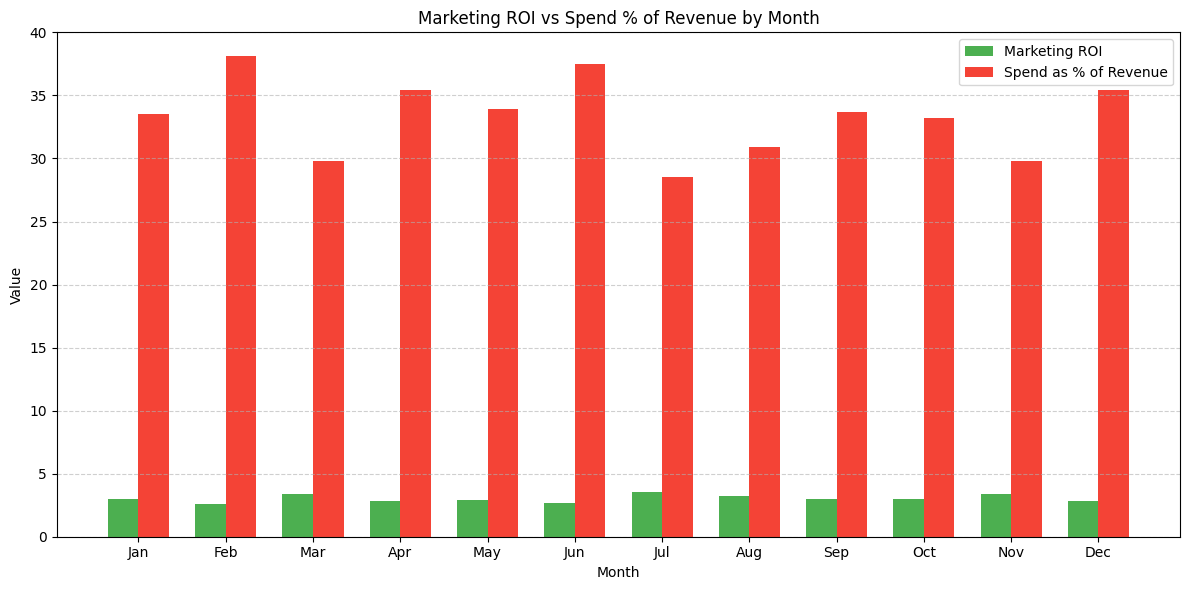

In [106]:
# Reuse `marketing_roi` if available
chart_df = marketing_roi.copy()

# Add month abbreviation for x-axis
chart_df['Month'] = chart_df['Txn_Month'].dt.strftime('%b')

# Round for display
chart_df['Marketing_ROI'] = chart_df['Marketing_ROI'].round(2)
chart_df['Spend_%_of_Revenue'] = chart_df['Spend_%_of_Revenue'].round(1)
import matplotlib.pyplot as plt
import numpy as np

# Set position for dual bars
x = np.arange(len(chart_df['Month']))
width = 0.35

plt.figure(figsize=(12, 6))

# Bar 1: ROI
plt.bar(x - width/2, chart_df['Marketing_ROI'], width, label='Marketing ROI', color='#4caf50')

# Bar 2: Spend % of Revenue
plt.bar(x + width/2, chart_df['Spend_%_of_Revenue'], width, label='Spend as % of Revenue', color='#f44336')

# Labels & formatting
plt.xticks(x, chart_df['Month'])
plt.title('Marketing ROI vs Spend % of Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Q10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)**


In [110]:
snapshot_date = merged_df['Transaction_Date'].max() + pd.Timedelta(days=1)

rfm = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (snapshot_date - x.max()).days,  # Recency (lower is better)
    'Transaction_ID': 'nunique',                                   # Frequency
    'Invoice_Value': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
# Recency thresholds (days since last purchase)
def recency_score(x):
    if x <= 30:
        return 'High'
    elif x <= 90:
        return 'Medium'
    else:
        return 'Low'

# Frequency thresholds
def frequency_score(x):
    if x >= 5:
        return 'High'
    elif x >= 3:
        return 'Medium'
    else:
        return 'Low'

# Monetary thresholds (spend in ₹)
def monetary_score(x):
    if x >= 10000:
        return 'High'
    elif x >= 5000:
        return 'Medium'
    else:
        return 'Low'

# Apply scoring
rfm['R_Score'] = rfm['Recency'].apply(recency_score)
rfm['F_Score'] = rfm['Frequency'].apply(frequency_score)
rfm['M_Score'] = rfm['Monetary'].apply(monetary_score)
def rfm_segment(row):
    if row['R_Score'] == 'High' and row['F_Score'] == 'High' and row['M_Score'] == 'High':
        return 'Premium'
    elif row['R_Score'] in ['High', 'Medium'] and row['F_Score'] in ['High', 'Medium'] and row['M_Score'] in ['High', 'Medium']:
        return 'Gold'
    elif row['R_Score'] == 'Medium' and (row['F_Score'] == 'Low' or row['M_Score'] == 'Low'):
        return 'Silver'
    else:
        return 'Standard'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)



Segment
Standard    1084
Silver       210
Gold         140
Premium       34
Name: count, dtype: int64


# **Q11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?**


In [113]:
rfm_revenue = pd.merge(merged_df, rfm[['CustomerID', 'Segment']], on='CustomerID', how='left')

segment_revenue = (
    rfm_revenue.groupby('Segment')['Invoice_Value']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'Total_Revenue', 'count': 'Transaction_Count'})
)

total_rev = segment_revenue['Total_Revenue'].sum()
segment_revenue['Revenue_Share (%)'] = (segment_revenue['Total_Revenue'] / total_rev * 100).round(2)

segment_revenue['Total_Revenue'] = segment_revenue['Total_Revenue'].round(2)
print(segment_revenue.sort_values(by='Total_Revenue', ascending=False))


    Segment  Total_Revenue  Transaction_Count  Revenue_Share (%)
3  Standard     2765454.35              30243              52.90
0      Gold     1230625.98              10965              23.54
1   Premium      756455.49               6748              14.47
2    Silver      474945.32               4968               9.09


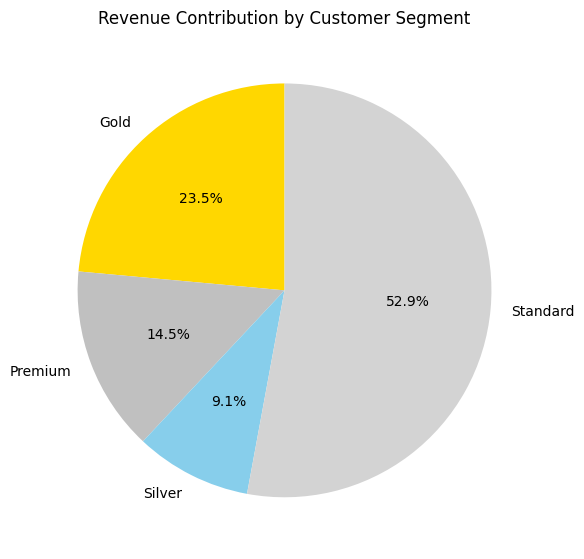

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    segment_revenue['Total_Revenue'],
    labels=segment_revenue['Segment'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['gold', 'silver', 'skyblue', 'lightgrey']
)
plt.title('Revenue Contribution by Customer Segment')
plt.tight_layout()
plt.show()


# **Q12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?**


In [119]:
from operator import attrgetter

merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

merged_df['Cohort_Month'] = merged_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

merged_df['Txn_Month'] = merged_df['Transaction_Date'].dt.to_period('M')
# Count active customers per cohort over time
cohort_data = merged_df.groupby(['Cohort_Month', 'Txn_Month'])['CustomerID'].nunique().reset_index()

# Calculate months since cohort
cohort_data['Cohort_Index'] = (cohort_data['Txn_Month'] - cohort_data['Cohort_Month']).apply(attrgetter('n'))

# Pivot to retention matrix
retention_matrix = cohort_data.pivot(index='Cohort_Month', columns='Cohort_Index', values='CustomerID')

# Calculate retention rate (% of Month 0 customers retained in each month)
cohort_sizes = retention_matrix.iloc[:, 0]
retention_rate = retention_matrix.divide(cohort_sizes, axis=0).round(3)

# Format for readability
retention_rate.index = retention_rate.index.to_timestamp().strftime('%b %Y')
retention_rate.columns = [f'Month {i}' for i in retention_rate.columns]

# Sort by Month 1 retention (first repeat purchase)
month_1_retention = retention_rate['Month 1'].sort_values(ascending=False)
best_cohorts = month_1_retention.head(3)
worst_cohorts = month_1_retention.tail(3)

print("Best Cohorts by Month 1 Retention:\n", best_cohorts)
print("\n Worst Cohorts by Month 1 Retention:\n", worst_cohorts)


Best Cohorts by Month 1 Retention:
 Cohort_Month
Jun 2019    0.146
Jul 2019    0.138
May 2019    0.107
Name: Month 1, dtype: float64

 Worst Cohorts by Month 1 Retention:
 Cohort_Month
Oct 2019    0.069
Jan 2019    0.060
Dec 2019      NaN
Name: Month 1, dtype: float64


# **Q13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?**


In [121]:
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

merged_df['Cohort_Month'] = merged_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

customer_ltv = merged_df.groupby(['CustomerID', 'Cohort_Month'])['Invoice_Value'].sum().reset_index()
customer_ltv.columns = ['CustomerID', 'Cohort_Month', 'Customer_LTV']
cohort_ltv = customer_ltv.groupby('Cohort_Month').agg(
    Total_Revenue=('Customer_LTV', 'sum'),
    Num_Customers=('CustomerID', 'nunique'),
    Avg_Customer_LTV=('Customer_LTV', 'mean')
).reset_index()


cohort_ltv['Cohort_Month'] = cohort_ltv['Cohort_Month'].dt.to_timestamp()


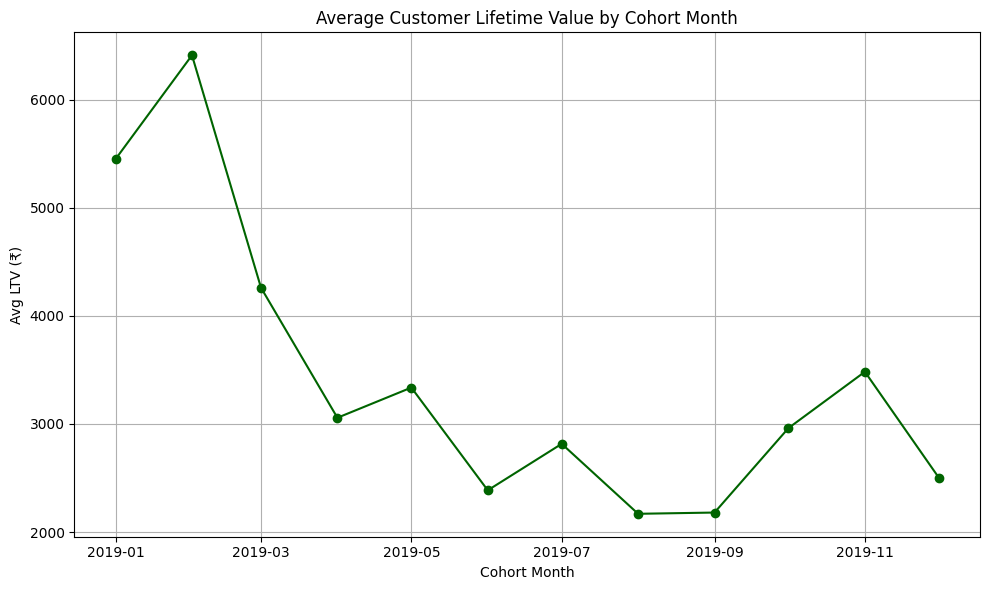

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cohort_ltv['Cohort_Month'], cohort_ltv['Avg_Customer_LTV'], marker='o', color='darkgreen')
plt.title('Average Customer Lifetime Value by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Avg LTV (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [123]:
cohort_ltv['Total_Revenue'] = cohort_ltv['Total_Revenue'].round(2)
cohort_ltv['Avg_Customer_LTV'] = cohort_ltv['Avg_Customer_LTV'].round(2)

print(cohort_ltv.sort_values(by='Avg_Customer_LTV', ascending=False))


   Cohort_Month  Total_Revenue  Num_Customers  Avg_Customer_LTV
1    2019-02-01      615328.25             96           6409.67
0    2019-01-01     1171635.75            215           5449.47
2    2019-03-01      754054.58            177           4260.20
10   2019-11-01      236817.92             68           3482.62
4    2019-05-01      373685.73            112           3336.48
3    2019-04-01      498337.26            163           3057.28
9    2019-10-01      257689.22             87           2961.95
6    2019-07-01      264722.99             94           2816.20
11   2019-12-01      265329.85            106           2503.11
5    2019-06-01      326938.44            137           2386.41
8    2019-09-01      170097.48             78           2180.74
7    2019-08-01      292843.68            135           2169.21
